# Assignment 2

Before working on this assignment please read these instructions fully. In the submission area, you will notice that you can click the link to **Preview the Grading** for each step of the assignment. This is the criteria that will be used for peer grading. Please familiarize yourself with the criteria before beginning the assignment.

An NOAA dataset has been stored in the file `data/C2A2_data/BinnedCsvs_d400/fb441e62df2d58994928907a91895ec62c2c42e6cd075c2700843b89.csv`. The data for this assignment comes from a subset of The National Centers for Environmental Information (NCEI) [Daily Global Historical Climatology Network](https://www1.ncdc.noaa.gov/pub/data/ghcn/daily/readme.txt) (GHCN-Daily). The GHCN-Daily is comprised of daily climate records from thousands of land surface stations across the globe.

Each row in the assignment datafile corresponds to a single observation.

The following variables are provided to you:

* **id** : station identification code
* **date** : date in YYYY-MM-DD format (e.g. 2012-01-24 = January 24, 2012)
* **element** : indicator of element type
    * TMAX : Maximum temperature (tenths of degrees C)
    * TMIN : Minimum temperature (tenths of degrees C)
* **value** : data value for element (tenths of degrees C)

For this assignment, you must:

1. Read the documentation and familiarize yourself with the dataset, then write some python code which returns a line graph of the record high and record low temperatures by day of the year over the period 2005-2014. The area between the record high and record low temperatures for each day should be shaded.
2. Overlay a scatter of the 2015 data for any points (highs and lows) for which the ten year record (2005-2014) record high or record low was broken in 2015.
3. Watch out for leap days (i.e. February 29th), it is reasonable to remove these points from the dataset for the purpose of this visualization.
4. Make the visual nice! Leverage principles from the first module in this course when developing your solution. Consider issues such as legends, labels, and chart junk.

The data you have been given is near **Ann Arbor, Michigan, United States**, and the stations the data comes from are shown on the map below.

In [ ]:
import matplotlib.pyplot as plt
import mplleaflet
import pandas as pd

def leaflet_plot_stations(binsize, hashid):

    df = pd.read_csv('data/C2A2_data/BinSize_d{}.csv'.format(binsize))

    station_locations_by_hash = df[df['hash'] == hashid]

    lons = station_locations_by_hash['LONGITUDE'].tolist()
    lats = station_locations_by_hash['LATITUDE'].tolist()

    plt.figure(figsize=(8,8))

    plt.scatter(lons, lats, c='r', alpha=0.7, s=200)

    return mplleaflet.display()

leaflet_plot_stations(400,'fb441e62df2d58994928907a91895ec62c2c42e6cd075c2700843b89')

In [1]:
#import libraries
import pandas as pd
import numpy as np

In [2]:
data_w = pd.read_csv('data/C2A2_data/BinnedCsvs_d400/fb441e62df2d58994928907a91895ec62c2c42e6cd075c2700843b89.csv')
#data_w.head()

In [3]:
# getting a unique set of dates for all date ranges
dates = data_w['Date']
dates = dates.sort_values(ascending=True)
dates = dates.unique()

In [4]:
print(dates)
print(len(dates))

['2005-01-01' '2005-01-02' '2005-01-03' ..., '2015-12-29' '2015-12-30'
 '2015-12-31']
4017


In [5]:
#dates to drop
leap_dates = ['2005-02-29','2006-02-29','2007-02-29','2008-02-29','2009-02-29','2010-02-29','2011-02-29','2012-02-29','2013-02-29','2014-02-29']
leap_dates = np.asarray(leap_dates)

In [6]:
#select dates from 2005-2014
dates2014 = data_w[data_w['Date'] <'2015-01-01']
dates2014 = dates2014['Date']
dates2014 = dates2014.sort_values(ascending=True)
dates2014 = dates2014.unique()
dates2014_final = np.setdiff1d(dates2014,leap_dates)

#print to confirm dates have been deleted
print(len(dates2014))
print(len(dates2014_final))

3652
3650


In [7]:
#Create a dataframe for data in 2015
data2015 = data_w[data_w['Date'] >='2015-01-01']
data2015['Month-Day'] = data2015['Date'].apply(lambda x: x[5:])

#get max values for each day of the year across 2005-2014
data2015_max = data2015.groupby('Month-Day')['Data_Value'].max()
data2015_min = data2015.groupby('Month-Day')['Data_Value'].min()

#print to confirm values are proper
print(len(data2015_max))
print(len(data2015_min))

365
365


/opt/conda/lib/python3.5/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


In [8]:
# Create a dataframe for Data and temperatures from 2005-2014
data2014 = data_w[data_w['Date'].isin(dates2014_final)]
data2014['Month-Day'] = data2014['Date'].apply(lambda x: x[5:])

#get max values for each day of the year across 2005-2014
data2014_max = data2014.groupby('Month-Day')['Data_Value'].max()
data2014_min = data2014.groupby('Month-Day')['Data_Value'].min()

#print values to confirm everything is working properly
print(data2014_max.head(), len(data2014_max))
print(data2014_min.head(), len(data2014_min))

Month-Day
01-01    156
01-02    139
01-03    133
01-04    106
01-05    128
Name: Data_Value, dtype: int64 365
Month-Day
01-01   -160
01-02   -267
01-03   -267
01-04   -261
01-05   -150
Name: Data_Value, dtype: int64 365


/opt/conda/lib/python3.5/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


In [9]:
#find which dates and values are greater in 2015
max_dates=[]
for date in data2014_max.index:
    if data2015_max[date]>data2014_max[date]:
        max_dates.append(date)
#        max_dates.append((date,data2015_max[date]))
max_dates_2015 = np.asarray(max_dates)
max_dates_2015

array(['02-09', '04-17', '05-07', '05-08', '05-11', '05-18', '07-27',
       '07-29', '08-19', '09-07', '09-08', '09-16', '09-17', '09-18',
       '09-28', '09-29', '10-20', '11-02', '11-03', '11-04', '11-05',
       '11-06', '11-18', '12-07', '12-08', '12-09', '12-10', '12-11',
       '12-12', '12-13', '12-14', '12-15', '12-16', '12-23', '12-24',
       '12-25', '12-26'], 
      dtype='<U5')

In [10]:
#create array of dates in which temperatures in 2015 were colder than 2005-2014
min_dates=[]
for date in data2014_max.index:
    if data2015_min[date]<data2014_min[date]:
        min_dates.append(date)
#       min_dates.append((date,data2015_min[date]))
min_dates_2015 = np.asarray(min_dates)
min_dates_2015

array(['01-05', '01-11', '02-03', '02-14', '02-15', '02-16', '02-17',
       '02-19', '02-20', '02-21', '02-23', '02-24', '02-25', '02-26',
       '02-27', '02-28', '03-05', '03-06', '03-07', '03-28', '03-29',
       '03-30', '04-24', '04-25', '05-20', '07-03', '08-28', '10-17',
       '10-18', '10-19', '10-20', '11-10'], 
      dtype='<U5')

In [11]:
#create a dataframe with only the dates that are record breaking
data2015_max_temp = data2015_max.reset_index()
data2015_broken_max = data2015_max_temp[data2015_max_temp['Month-Day'].isin(max_dates_2015)]
#print(data2015_broken_max)

#create a dataframe with only the dates that are record breaking
data2015_min_temp = data2015_min.reset_index()
data2015_broken_min = data2015_min_temp[data2015_min_temp['Month-Day'].isin(min_dates_2015)]
#print(data2015_broken_min)


In [12]:
#import charting libraries
%matplotlib notebook
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.get_backend()

'nbAgg'

<IPython.core.display.Javascript object>


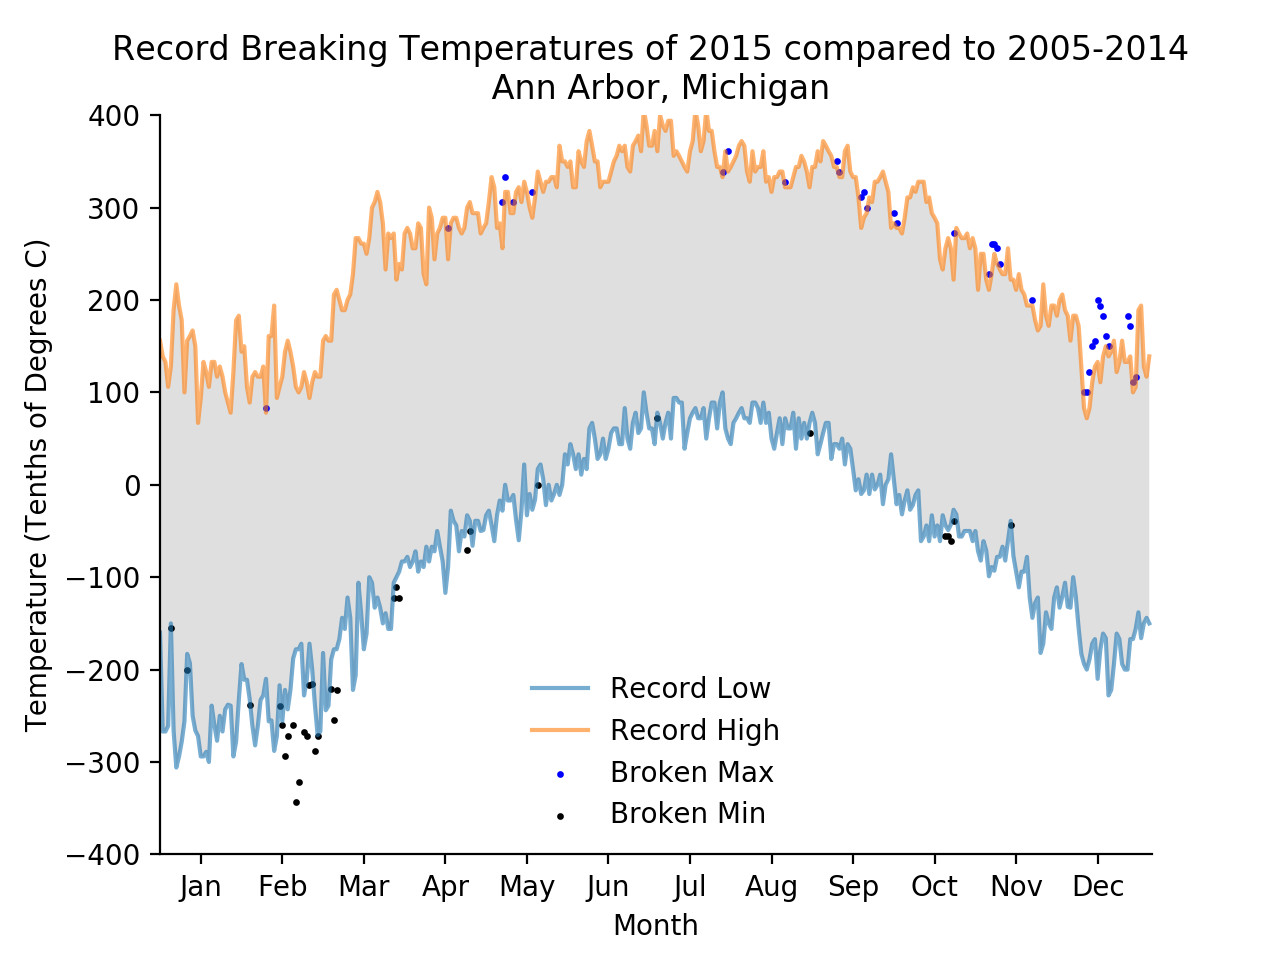

([<matplotlib.axis.XTick at 0x7fedf43d7ef0>,
 <a list of 12 Text xticklabel objects>)

In [19]:
#plot some points
plt.figure()

#plot min values
plt.plot(data2014_min.values, alpha=0.6, label= 'Record Low')
         
#plot max values
plt.plot(data2014_max.values, alpha=0.6, label='Record High')

#Plot label
plt.xlabel('Month')
plt.ylabel('Temperature (Tenths of Degrees C)')
plt.title('Record Breaking Temperatures of 2015 compared to 2005-2014 \n Ann Arbor, Michigan')

#plot filling between min and max temperatures
plt.gca().fill_between(range(len(data2014_min.values)), 
                       data2014_min.values,
                       data2014_max.values, 
                       facecolor='grey', 
                       alpha=0.25)


#Plot scatter values for record-breaking temperatures in 2015
plt.scatter(data2015_broken_max.index, data2015_broken_max['Data_Value'].loc[data2015_broken_max.index], s = 2, c = 'blue', label = 'Broken Max')
plt.scatter(data2015_broken_min.index, data2015_broken_min['Data_Value'].loc[data2015_broken_min.index], s = 2, c = 'black', label = 'Broken Min')

#set axes values
plt.gca().axis([0, 365, -400, 400])
plt.legend(frameon = False)

#remove chart lines on top and right
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

#Add xticks labels
a = [15, 45, 75, 105, 135, 165, 195, 225, 255, 285, 315, 345]
month_name = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
plt.xticks(a, month_name)